In [1]:
import json
from core.analysis import *

In [ ]:
db = access_db()

In [ ]:
trials = get_trial_data(db)

In [4]:
participants = get_participant_data(db)

In [5]:
wids = [27046826551,
67313721753,
14715705020,
65643517184,
86979612220,
26312944991]
#Worker IDs of subjects who completed expt
wids = [str(i) for i in wids]

Getting data for users who completed the experiment

In [6]:
users = participants[participants['workerID'].isin(wids) & participants['completedTask'] == 1]['userID']
results = trials[trials['userID'].isin(users)]
results

,trialID,userID,trialIndex,trialType,prevChanged,lemma,sense,x,y
206,-M3pVhmrS4LVzC6_gIcJ,-M3pVTw9ili6muvdZKg4,1,training,1,bank_n,bank_n_01,173.0,360.0
207,-M3pVhmrS4LVzC6_gIcJ,-M3pVTw9ili6muvdZKg4,1,training,1,bank_n,bank_n_05,614.0,362.0
208,-M3pVhmrS4LVzC6_gIcJ,-M3pVTw9ili6muvdZKg4,1,training,1,bank_n,depository_financial_institution_n_01,499.0,368.0
209,-M3pVmug0DJj2iajKInK,-M3pVTw9ili6muvdZKg4,2,training,0,bass_n,bass_n_03,241.0,402.0
210,-M3pVmug0DJj2iajKInK,-M3pVTw9ili6muvdZKg4,2,training,0,bass_n,bass_n_04,723.0,324.0
...,...,...,...,...,...,...,...,...,...
583,-M3xeVNWfkT0t_uBUSUG,-M3xbEdg3XIZca4MA7SZ,17,repeat,2,drive_v,force_v_06,-1.0,-1.0
584,-M3xedDrx2cDlTV-jcAH,-M3xbEdg3XIZca4MA7SZ,18,repeat,1,death_n,death_n_01,592.0,366.0
585,-M3xedDrx2cDlTV-jcAH,-M3xbEdg3XIZca4MA7SZ,18,repeat,1,death_n,death_n_02,403.0,383.0
586,-M3xedDrx2cDlTV-jcAH,-M3xbEdg3XIZca4MA7SZ,18,repeat,1,death_n,death_n_03,345.0,361.0


Sanity check on definitions of bank

In [9]:
import matplotlib.pyplot as plt

In [28]:
plt.set_cmap('Blues')

<Figure size 432x288 with 0 Axes>

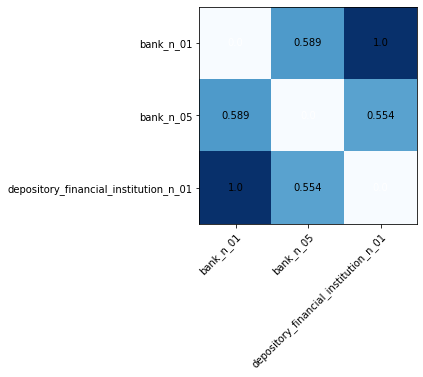

In [29]:
user_result, senses = get_subject_mtx(results, '-M3xbEdg3XIZca4MA7SZ', 'bank_n', 'training')
plot_mtx(user_result, senses)

Distance matrices for all the words shared between participants

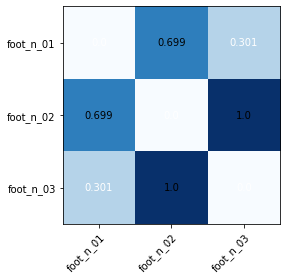

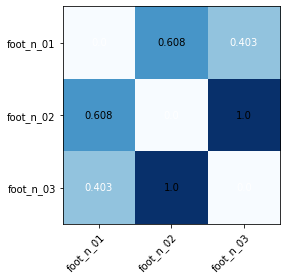

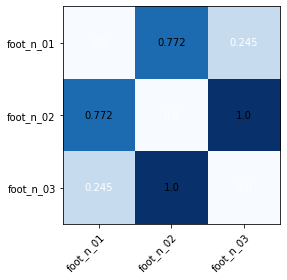

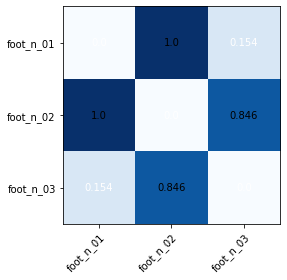

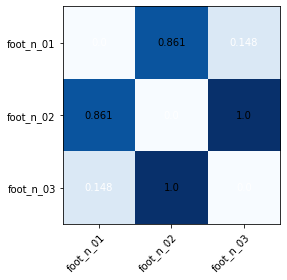

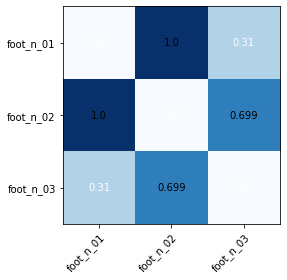

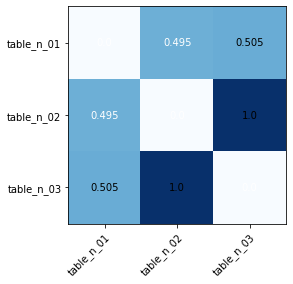

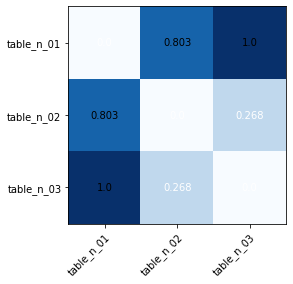

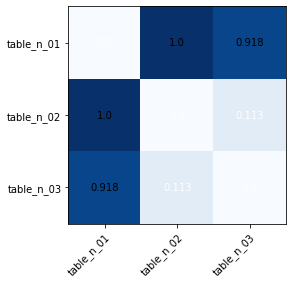

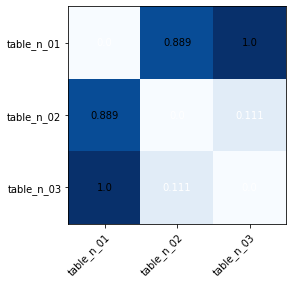

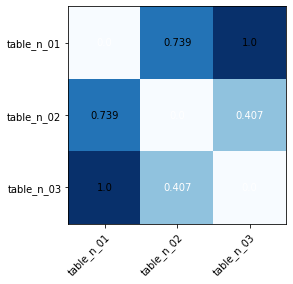

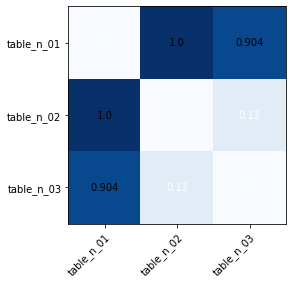

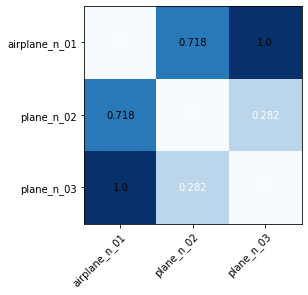

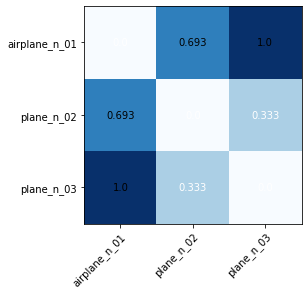

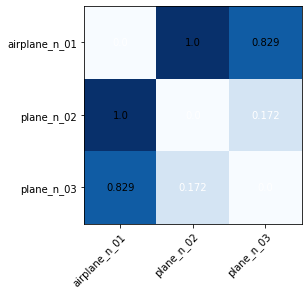

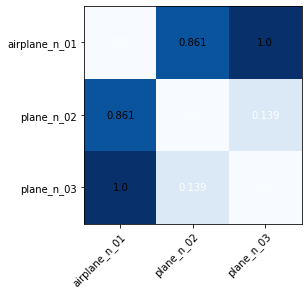

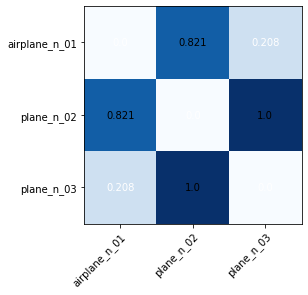

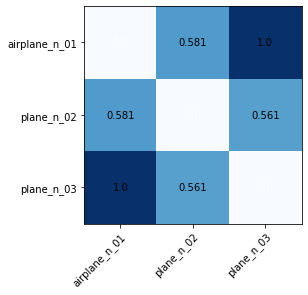

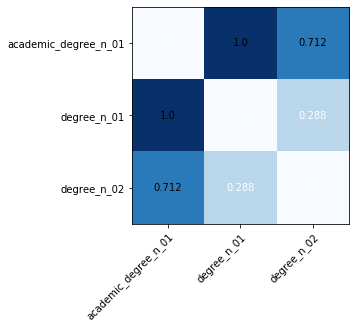

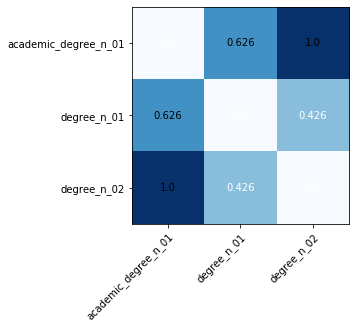

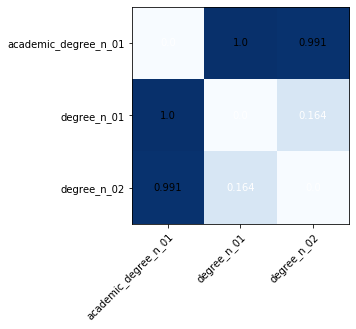

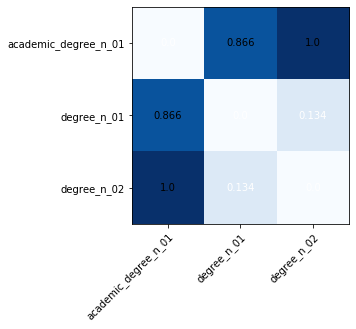

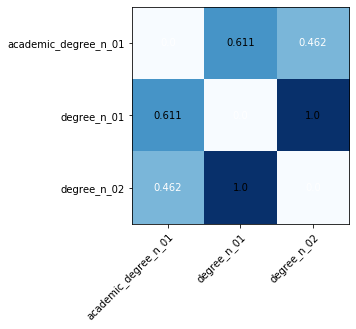

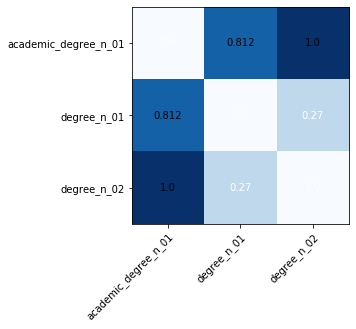

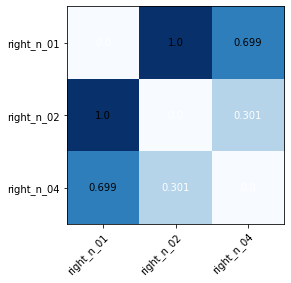

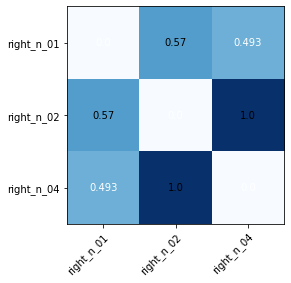

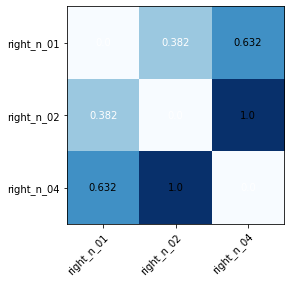

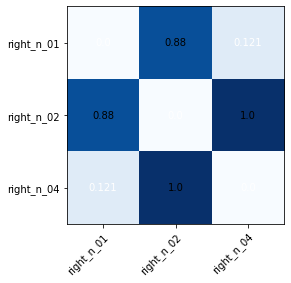

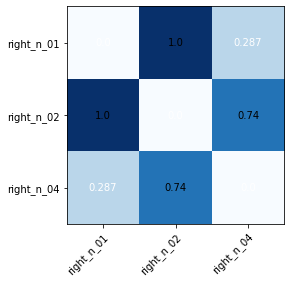

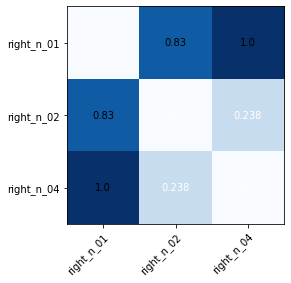

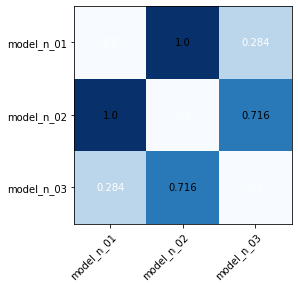

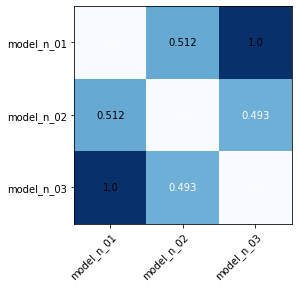

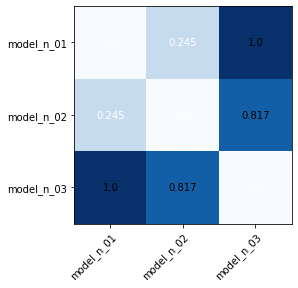

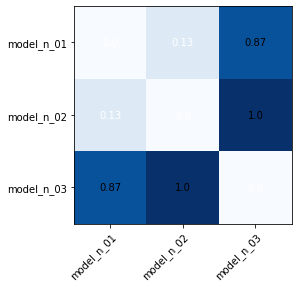

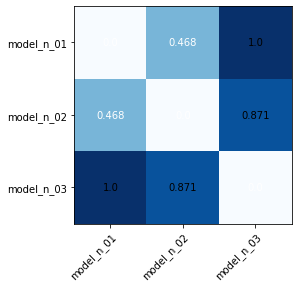

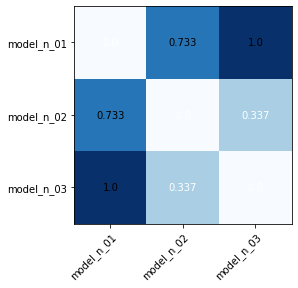

In [30]:
shared_words = results[results['trialType'] == 'shared']['lemma'].unique()
for w in shared_words:
    for u in users:
        user_result, senses = get_subject_mtx(results, u, w, 'shared')
        plot_mtx(user_result, senses)